# Tracking efficiency

Are the tracks always reconstructed in an efficient way, independent of the rate? And does the angle of the detector change with the rate?
This should not be rate dependent, but check this: 
- Look at different runs, plot mean chi2 against the rate. Exclude events with chi2=0.
- Look at different runs, plot mean angle as function of rate.

In [1]:
%load_ext autoreload
%autoreload 2
from testbeam import *

/eos/home-i02/s/sivander/SWAN_projects/tutorial/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/eos/home-i02/s/sivander/SWAN_projects/tutorial/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
%time file = read_runinfo('GEM GIF++ testbeam 2022')
%time file = add_rate(file, "rate_attenuation.txt")

CPU times: user 128 ms, sys: 3.23 ms, total: 132 ms
Wall time: 136 ms
CPU times: user 1.8 ms, sys: 829 µs, total: 2.63 ms
Wall time: 20.2 ms


In [3]:
%time file = add_chi2(file)

CPU times: user 2min 2s, sys: 1.59 s, total: 2min 4s
Wall time: 2min 7s


In [4]:
%time file = add_rotation(file, show=False)

/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  retu

/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  retu

CPU times: user 2min 16s, sys: 1.35 s, total: 2min 17s
Wall time: 2min 19s


In [5]:
rate = file['source_rate']
chi2 = file['mean_chi2']
rotation = file['rotation']

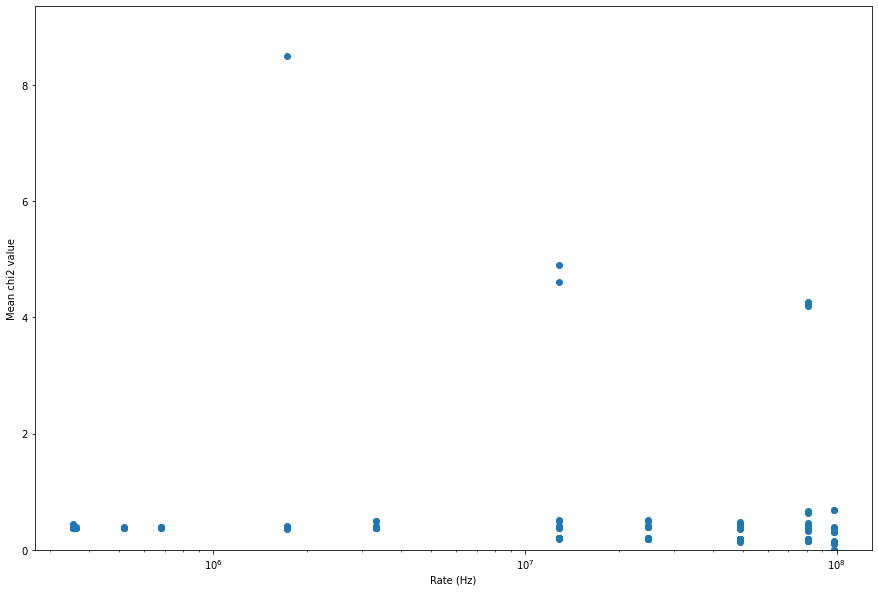

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(rate, chi2)
ax.set(xlabel='Rate (Hz)', ylabel='Mean chi2 value', ylim=(0, 1.1*np.max(chi2)), xscale='log')
plt.show()

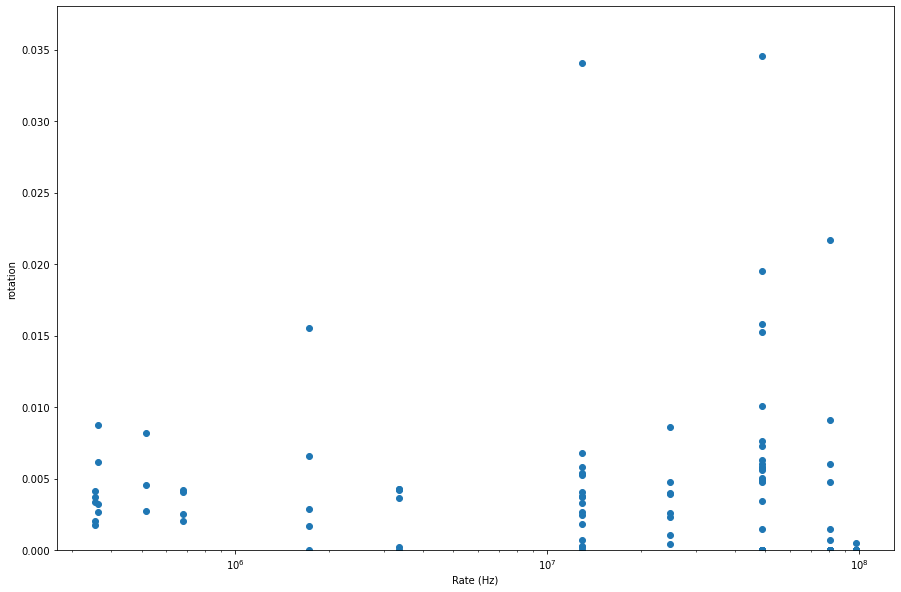

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(rate, rotation)
ax.set(xlabel='Rate (Hz)', ylabel='rotation', ylim=(0, 1.1*np.max(rotation)), xscale='log')
plt.show()